In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [4]:
df =  pd.read_excel(r"D:\ML\Flight_price_prediction\data\Data_Train.xlsx")

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
def convert_datetime(df,cols):
    for col in cols:
        df[col] = pd.to_datetime(df[col], format='mixed',dayfirst=True)
    return df

In [7]:
df = convert_datetime(df,['Date_of_Journey','Arrival_Time','Dep_Time'])

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
df.dropna(inplace=True)#dropping the null values as it is very low in count.

In [10]:
import re
def extract_time(time_str):
    # Regular expression to match hours and minutes
    pattern = r'((?P<hours>\d+)h)?\s*((?P<minutes>\d*)m)?'
    
    match = re.match(pattern, time_str)
    
    if match:
        hour = int(match.group('hours')) if match.group('hours') else 0
        minute= int(match.group('minutes')) if match.group('minutes') else 0

        return hour, minute
    else:
        return None

In [11]:
df[['duration_hour','duration_minutes']] = df['Duration'].apply(lambda x: pd.Series(extract_time(x)))

In [12]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,duration_hour,duration_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-11-04 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-11-04 05:50:00,2024-11-04 13:15:00,7h 25m,2 stops,No info,7662,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-11-04 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-11-04 18:05:00,2024-11-04 23:30:00,5h 25m,1 stop,No info,6218,5,25
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-11-04 16:50:00,2024-11-04 21:35:00,4h 45m,1 stop,No info,13302,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,2024-11-04 19:55:00,2024-11-04 22:25:00,2h 30m,non-stop,No info,4107,2,30
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2024-11-04 20:45:00,2024-11-04 23:20:00,2h 35m,non-stop,No info,4145,2,35
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2024-11-04 08:20:00,2024-11-04 11:20:00,3h,non-stop,No info,7229,3,0
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,2024-11-04 11:30:00,2024-11-04 14:10:00,2h 40m,non-stop,No info,12648,2,40


In [13]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format = "%y/%m/%d")

df['journey_day'] = df['Date_of_Journey'].dt.day
df['journey_month'] = df['Date_of_Journey'].dt.month

df['dep_hour'] = df['Dep_Time'].dt.hour
df['dep_min'] = df['Dep_Time'].dt.minute

df['Arrival_hour'] = df['Arrival_Time'].dt.hour
df['Arrival_min'] = df['Arrival_Time'].dt.minute

df.drop(['Date_of_Journey','Arrival_Time','Dep_Time','Duration'], inplace = True, axis =1)

In [14]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,duration_hour,duration_minutes,journey_day,journey_month,dep_hour,dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2,50,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,7,25,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,19,0,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,25,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,4,45,1,3,16,50,21,35


In [15]:
# categorical feature handling
df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

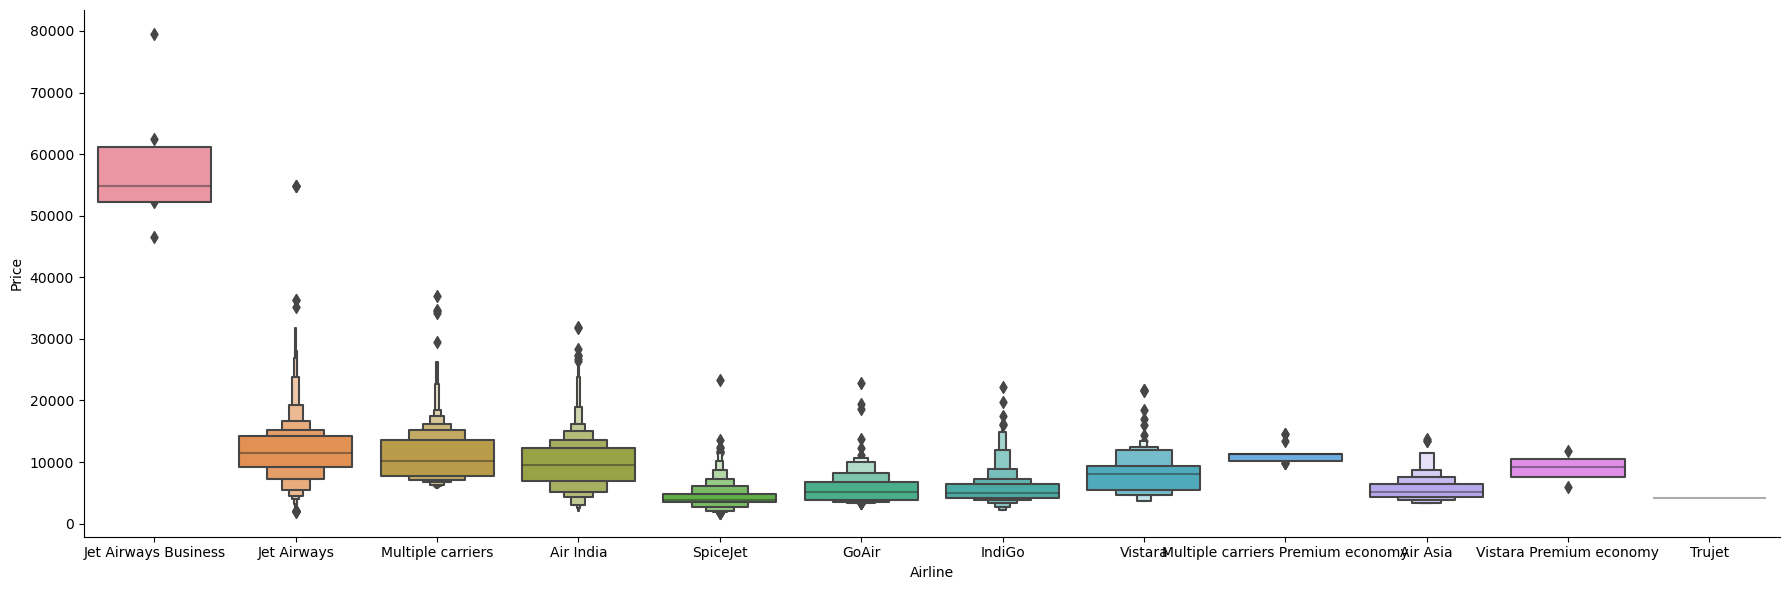

In [16]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.catplot(x='Airline',y='Price', data = df.sort_values('Price',ascending=False),kind = 'boxen', height = 6, aspect=3)

In [17]:
# airline is nominal cat data looking at the graph above wrt to the price.
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False,drop = 'first')
encoded_col = ohe.fit_transform(df[['Airline','Source','Destination']])

enc_df= pd.DataFrame(encoded_col, columns=ohe.get_feature_names_out(['Airline','Source','Destination']))
enc_df

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10678,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10679,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
df=pd.concat([df,enc_df], axis=1)

In [19]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,duration_hour,duration_minutes,journey_day,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897.0,2.0,50.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662.0,7.0,25.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882.0,19.0,0.0,9.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218.0,5.0,25.0,12.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302.0,4.0,45.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145.0,2.0,35.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229.0,3.0,0.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648.0,2.0,40.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10682,Air India,Delhi,Cochin,DEL → GOI → BOM → COK,2 stops,No info,11753.0,8.0,20.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.dropna(inplace=True)

In [21]:
df.drop(columns=['Source','Destination', 'Route','Additional_Info','Airline'],inplace=True)

In [22]:
df

,Total_Stops,Price,duration_hour,duration_minutes,journey_day,journey_month,dep_hour,dep_min,Arrival_hour,Arrival_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,non-stop,3897.0,2.0,50.0,24.0,3.0,22.0,20.0,1.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2 stops,7662.0,7.0,25.0,1.0,5.0,5.0,50.0,13.0,15.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2 stops,13882.0,19.0,0.0,9.0,6.0,9.0,25.0,4.0,25.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1 stop,6218.0,5.0,25.0,12.0,5.0,18.0,5.0,23.0,30.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1 stop,13302.0,4.0,45.0,1.0,3.0,16.0,50.0,21.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,non-stop,3257.0,2.0,40.0,21.0,5.0,5.0,55.0,8.0,35.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10678,non-stop,4107.0,2.0,30.0,9.0,4.0,19.0,55.0,22.0,25.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10679,non-stop,4145.0,2.0,35.0,27.0,4.0,20.0,45.0,23.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10680,non-stop,7229.0,3.0,0.0,27.0,4.0,8.0,20.0,11.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<Axes: xlabel='Total_Stops', ylabel='Price'>

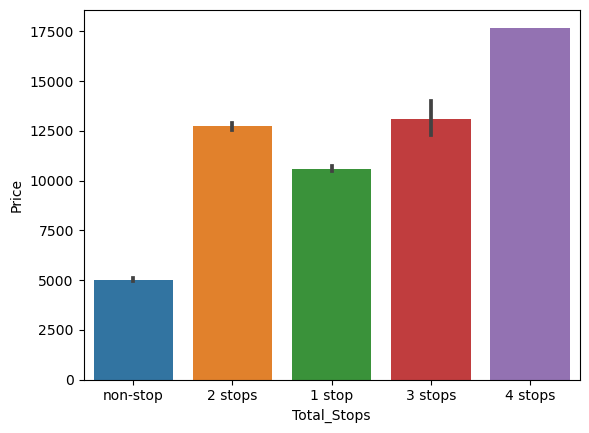

In [23]:
sns.barplot(x='Total_Stops',y='Price',data=df)

In [24]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [25]:
#looking at the graph above it can be seen that there is more the stops more is the price approx.
# so we do label encoding here.
df.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}, inplace=True)

# Test dataset pre process copy

In [27]:
test=pd.read_excel(r"D:\ML\Flight_price_prediction\data\Test_set.xlsx")

In [28]:
test=convert_datetime(test,['Date_of_Journey','Arrival_Time','Dep_Time'])

In [29]:
test[['duration_hour','duration_minutes']] = test['Duration'].apply(lambda x: pd.Series(extract_time(x)))

In [30]:
test['Date_of_Journey'] = pd.to_datetime(test['Date_of_Journey'], format = "%y/%m/%d")

test['journey_day'] = test['Date_of_Journey'].dt.day
test['journey_month'] = test['Date_of_Journey'].dt.month

test['dep_hour'] = test['Dep_Time'].dt.hour
test['dep_min'] = test['Dep_Time'].dt.minute

test['Arrival_hour'] = test['Arrival_Time'].dt.hour
test['Arrival_min'] = test['Arrival_Time'].dt.minute

test.drop(['Date_of_Journey','Arrival_Time','Dep_Time','Duration'], inplace = True, axis =1)

In [31]:
test_encoded_col = ohe.transform(test[['Airline','Source','Destination']])

test_enc_df= pd.DataFrame(test_encoded_col, columns=ohe.get_feature_names_out(['Airline','Source','Destination']))


In [32]:
test=pd.concat([test,test_enc_df], axis=1)

In [33]:
test.drop(columns=['Source','Destination', 'Route','Additional_Info','Airline'],inplace=True)

In [34]:
test.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}, inplace=True)

Feature Selection

In [35]:
df.columns

Index(['Total_Stops', 'Price', 'duration_hour', 'duration_minutes',
       'journey_day', 'journey_month', 'dep_hour', 'dep_min', 'Arrival_hour',
       'Arrival_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [36]:
X=df.loc[: , ['Total_Stops', 'duration_hour', 'duration_minutes',
       'journey_day', 'journey_month', 'dep_hour', 'dep_min', 'Arrival_hour',
       'Arrival_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
y=df.loc[:,['Price']]

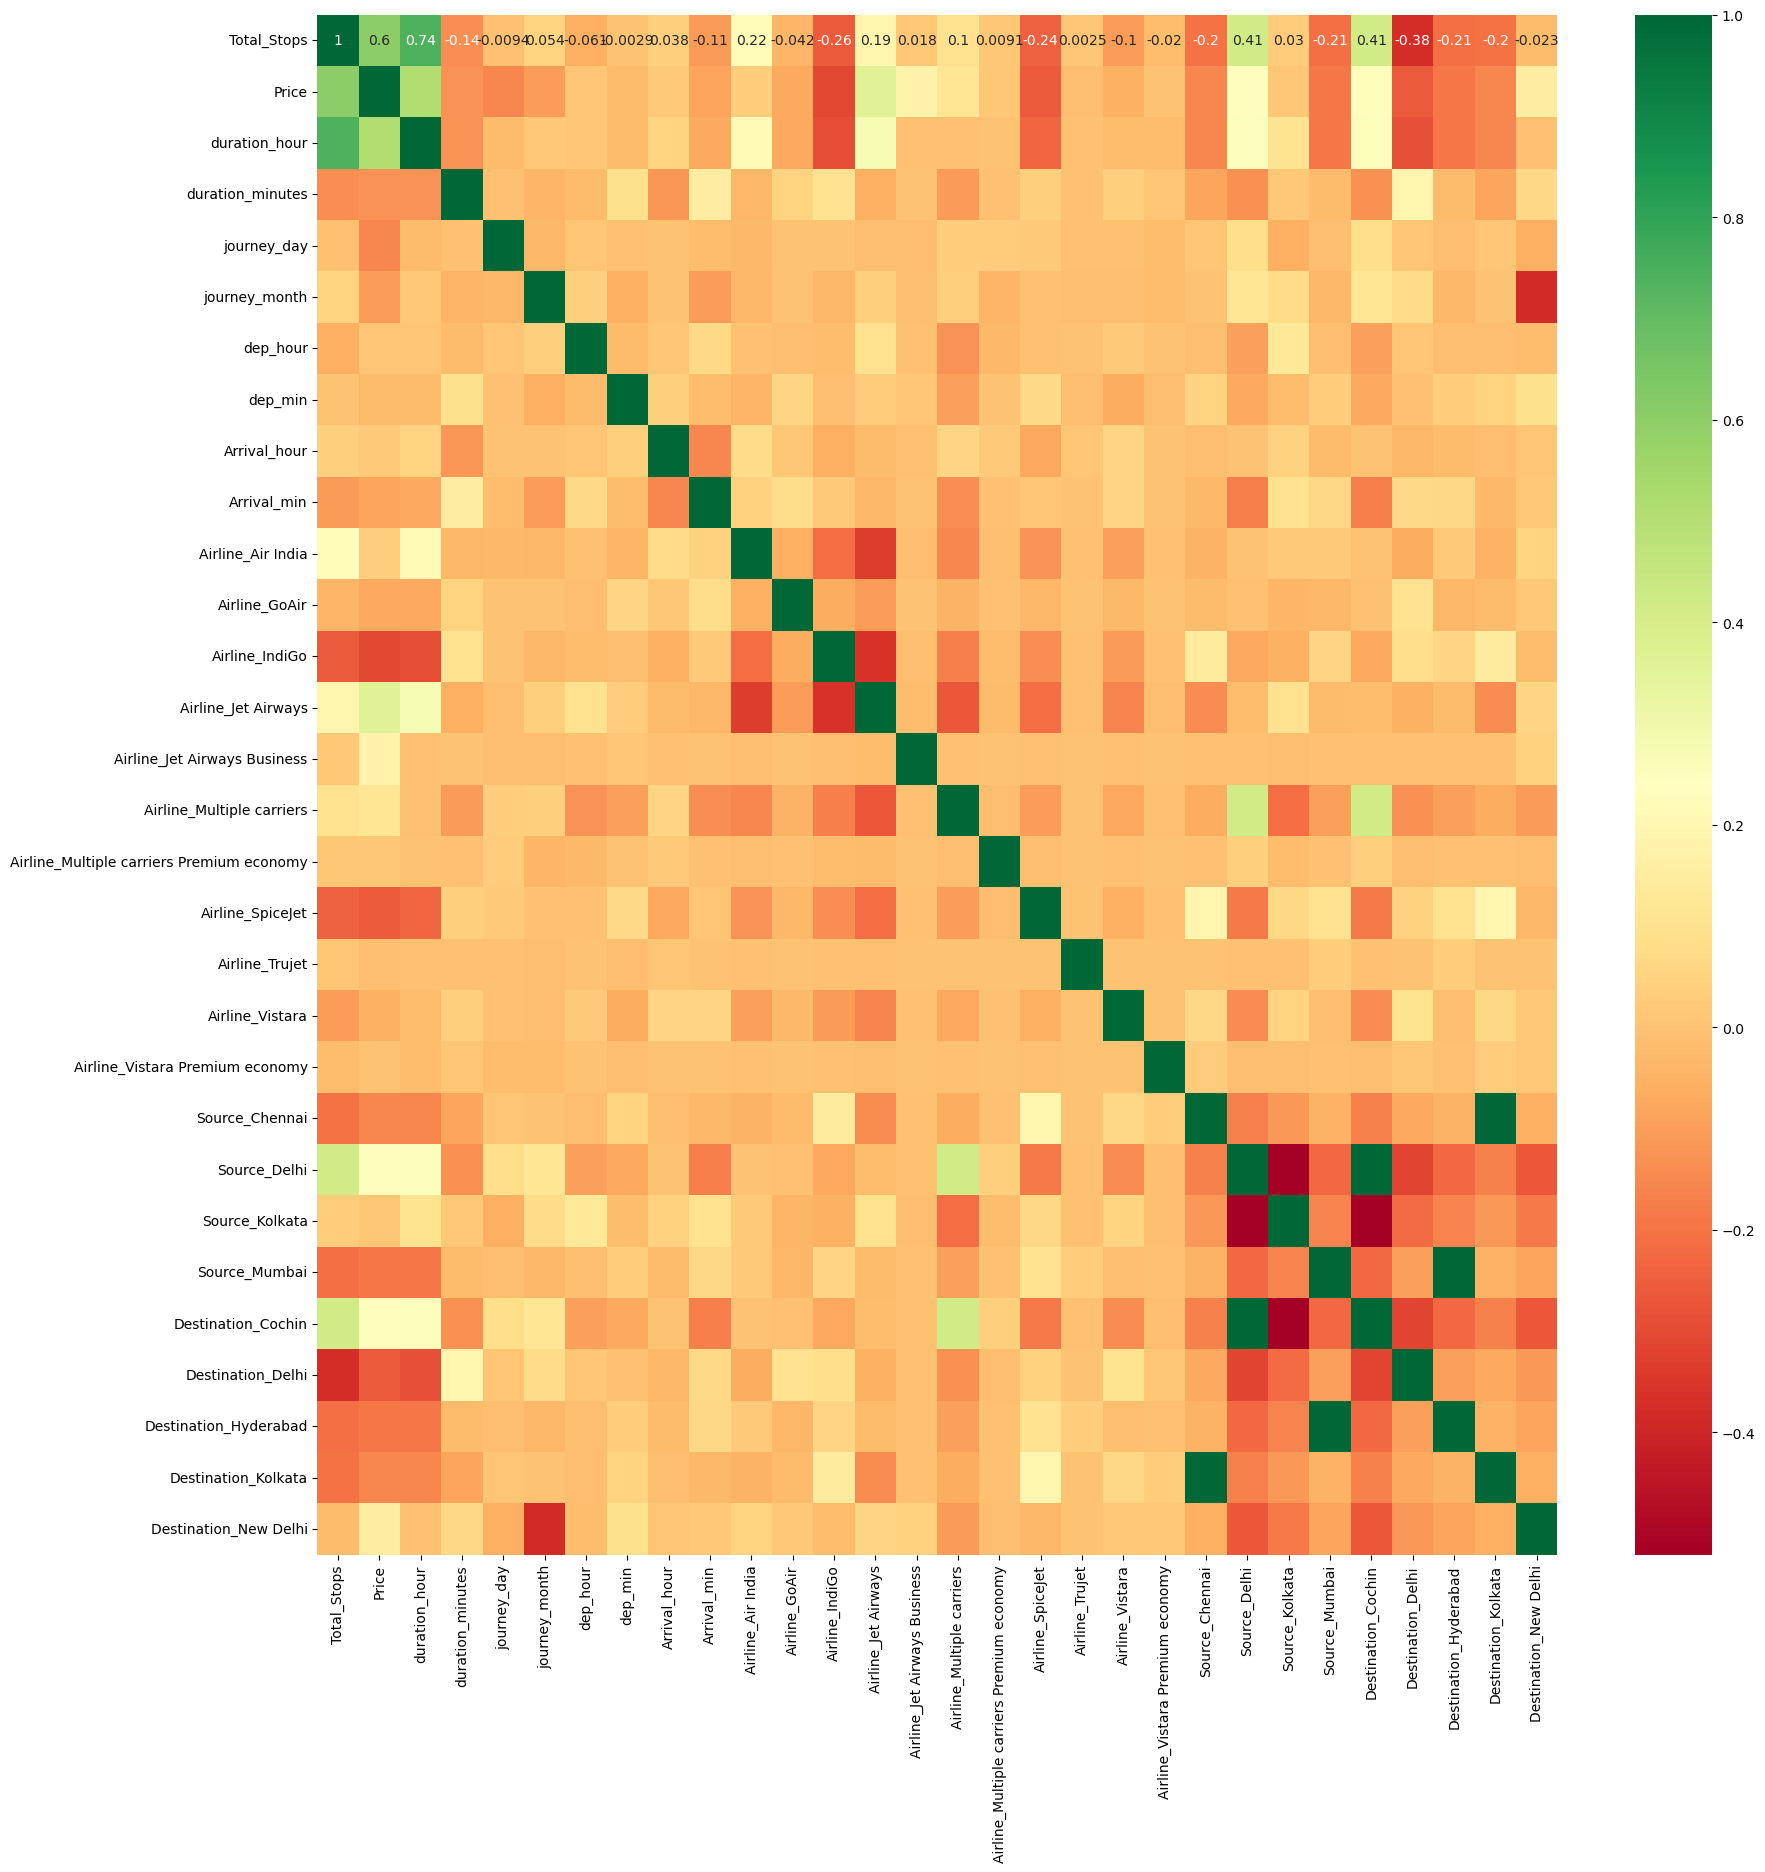

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [38]:
from sklearn.ensemble import ExtraTreesRegressor
select = ExtraTreesRegressor()
select.fit(X,y)

ExtraTreesRegressor()

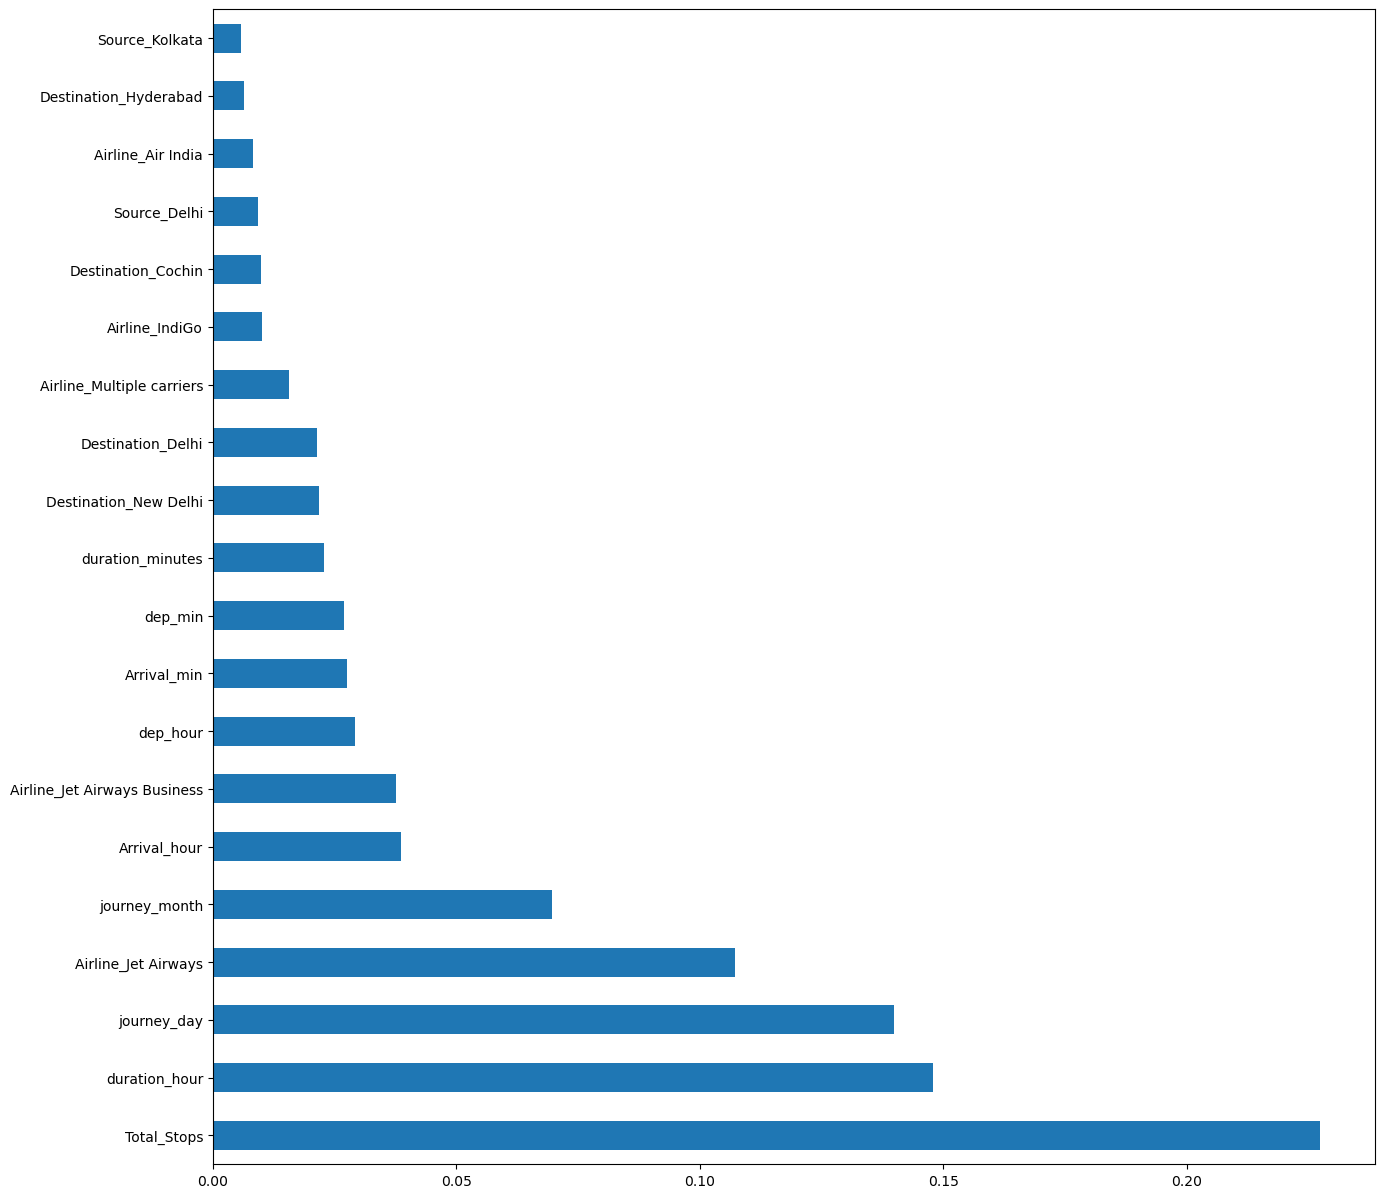

In [39]:
plt.figure(figsize=(15,15))
feature_importance = pd.Series(select.feature_importances_, index=X.columns)
feature_importance . nlargest(20).plot(kind='barh')
plt.show()

# model building and validation.

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

In [41]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [42]:
rfr.score(X_train, y_train)

0.9518117604124825

In [43]:
y_pred = rfr.predict(X_test)

In [44]:
rfr.score(X_test,y_test)

0.7673355179318649

In [45]:
from sklearn. metrics import r2_score
r2_score(y_test,y_pred)

0.7673355179318649

# Hyper parameter tuning

In [46]:
from sklearn.model_selection import RandomizedSearchCV

In [47]:
# randomized search cv
# number of trees in the random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num=12)]

# number of features considered in each split
max_features = ['auto', 'sqrt']

# max depth of a tree in the forest
max_depth = [int(x) for x in np.linspace(5,30, num=6)]

# min number of samples required in a node to split 
min_sample_split = [2,5,10,15,30,60,100]

# min number of samples required in each leaf node

min_sample_leaf = [1,2,5,10,15]

In [48]:
random_grid={
    'n_estimators' : n_estimators,
    'max_features': max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_sample_split,
    'min_samples_leaf': min_sample_leaf,
}

In [51]:
rf_random = RandomizedSearchCV(estimator = rfr, param_distributions=random_grid, scoring = 'neg_mean_squared_error', n_iter = 50, cv=7, n_jobs=1,verbose=2 )

In [52]:
rf_random.fit(X_train, y_train)

Fitting 7 folds for each of 50 candidates, totalling 350 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=30, n_estimators=1000; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=30, n_estimators=1000; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=30, n_estimators=1000; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=30, n_estimators=1000; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=30, n_estimators=1000; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=30, n_estimators=1000; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=30, n_estimators=1000; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=30,

RandomizedSearchCV(cv=7, estimator=RandomForestRegressor(), n_iter=50, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10, 15],
                                        'min_samples_split': [2, 5, 10, 15, 30,
                                                              60, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [53]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 25}

In [54]:
optimized_preds=rf_random.predict(X_test)

In [55]:
r2_score(y_test,optimized_preds)

0.7821155093403179